# Veri Ön İşleme

## Aykırı Gözlem Analizi

Aykırı Değerleri Yakalamak

In [1]:
import seaborn as sns

In [2]:
df=sns.load_dataset("diamonds")
df=df.select_dtypes(include=["float","int64"])
df=df.dropna()
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [3]:
df_table=df["table"]
df_table.head()

0    55.0
1    61.0
2    65.0
3    58.0
4    58.0
Name: table, dtype: float64

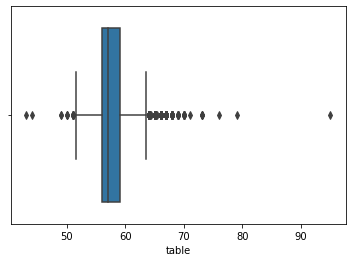

In [4]:
sns.boxplot(x=df_table)

In [7]:
Q1=df_table.quantile(0.25)
Q3=df_table.quantile(0.75)
IQR=Q3-Q1

In [8]:
Q1

56.0

In [9]:
Q3

59.0

In [10]:
IQR

3.0

In [11]:
alt_sinir = Q1 - 1.5 * IQR
alt_sinir

51.5

In [12]:
ust_sinir=Q3 + 1.5 * IQR
ust_sinir

63.5

In [24]:
(df_table < alt_sinir) | (df_table > ust_sinir)

0        False
1        False
2         True
3        False
4        False
         ...  
53935    False
53936    False
53937    False
53938    False
53939    False
Name: table, Length: 53940, dtype: bool

In [26]:
aykiri_tf=df_table < alt_sinir
aykiri_tf.head()

0    False
1    False
2    False
3    False
4    False
Name: table, dtype: bool

In [27]:
df_table[aykiri_tf]

1515     51.0
3238     50.1
3979     51.0
4150     51.0
5979     49.0
7418     50.0
8853     51.0
11368    43.0
22701    49.0
25179    50.0
26387    51.0
33586    51.0
35633    44.0
45798    51.0
46040    51.0
47630    51.0
Name: table, dtype: float64

In [28]:
df_table[aykiri_tf].count()

16

In [29]:
df_table[aykiri_tf].index

Int64Index([ 1515,  3238,  3979,  4150,  5979,  7418,  8853, 11368, 22701,
            25179, 26387, 33586, 35633, 45798, 46040, 47630],
           dtype='int64')

## Aykırı Değer Problemini Çözmek

Silme Yaklaşımı

In [30]:
import pandas as pd

In [31]:
type(df_table)

pandas.core.series.Series

In [32]:
df_table=pd.DataFrame(df_table)

In [33]:
df_table.shape

(53940, 1)

In [36]:
t_df=df_table[~((df_table < alt_sinir) | (df_table > ust_sinir)).any(axis=1)]
t_df.shape

(53335, 1)

### Ortalama ile Doldurma

In [37]:
df=sns.load_dataset("diamonds")
df=df.select_dtypes(include=["float","int64"])
df=df.dropna()
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [38]:
df_table=df["table"]
df_table.head()

0    55.0
1    61.0
2    65.0
3    58.0
4    58.0
Name: table, dtype: float64

In [39]:
aykiri_tf.head()

0    False
1    False
2    False
3    False
4    False
Name: table, dtype: bool

In [41]:
df_table[aykiri_tf]

1515     51.0
3238     50.1
3979     51.0
4150     51.0
5979     49.0
7418     50.0
8853     51.0
11368    43.0
22701    49.0
25179    50.0
26387    51.0
33586    51.0
35633    44.0
45798    51.0
46040    51.0
47630    51.0
Name: table, dtype: float64

In [42]:
df_table.mean()

57.45718390804603

In [43]:
df_table[aykiri_tf]=df_table.mean()

C:\Users\feyza\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [44]:
df_table[aykiri_tf]

1515     57.457184
3238     57.457184
3979     57.457184
4150     57.457184
5979     57.457184
7418     57.457184
8853     57.457184
11368    57.457184
22701    57.457184
25179    57.457184
26387    57.457184
33586    57.457184
35633    57.457184
45798    57.457184
46040    57.457184
47630    57.457184
Name: table, dtype: float64

### Baskılama Yöntemi

In [46]:
df=sns.load_dataset("diamonds")
df=df.select_dtypes(include=["float","int64"])
df=df.dropna()
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [47]:
df_table=df["table"]
df_table.head()

0    55.0
1    61.0
2    65.0
3    58.0
4    58.0
Name: table, dtype: float64

In [48]:
df_table[aykiri_tf]

1515     51.0
3238     50.1
3979     51.0
4150     51.0
5979     49.0
7418     50.0
8853     51.0
11368    43.0
22701    49.0
25179    50.0
26387    51.0
33586    51.0
35633    44.0
45798    51.0
46040    51.0
47630    51.0
Name: table, dtype: float64

In [49]:
df_table[aykiri_tf] = alt_sinir
df_table[aykiri_tf]

C:\Users\feyza\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


1515     51.5
3238     51.5
3979     51.5
4150     51.5
5979     51.5
7418     51.5
8853     51.5
11368    51.5
22701    51.5
25179    51.5
26387    51.5
33586    51.5
35633    51.5
45798    51.5
46040    51.5
47630    51.5
Name: table, dtype: float64

### Çok Değişkenli Aykırı Gözlem Analizi

### Local Outlier Factor

In [51]:
diamonds=sns.load_dataset("diamonds")
diamonds=diamonds.select_dtypes(include=["float","int64"])
df=diamonds.copy()
df=df.dropna()
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [52]:
import numpy as np
from sklearn.neighbors import LocalOutlierFactor

In [53]:
clf = LocalOutlierFactor(n_neighbors=20,contamination=0.1)

In [54]:
clf.fit_predict(df)

array([-1, -1, -1, ...,  1,  1,  1])

In [55]:
df_scores=clf.negative_outlier_factor_

In [56]:
df_scores[0:20]

array([-1.58352526, -1.59732899, -1.62278873, -1.33002541, -1.30712521,
       -1.28408436, -1.28428162, -1.26458706, -1.28422952, -1.27351342,
       -1.23611906, -1.20830179, -1.17637026, -1.13060731, -1.14305176,
       -1.11364018, -1.21093135, -1.13307628, -1.08093519, -1.08139269])

In [57]:
np.sort(df_scores)[0:20]

array([-8.60430658, -8.20889984, -5.86084355, -4.98415175, -4.81502092,
       -4.81502092, -4.61522833, -4.37081214, -4.29842288, -4.10492387,
       -4.0566648 , -4.01831733, -3.94882806, -3.82378797, -3.80135297,
       -3.75680919, -3.65947378, -3.59249261, -3.55564138, -3.47157375])

In [67]:
esik_deger=np.sort(df_scores)[15]
esik_deger

-3.7568091859314747

In [68]:
aykiri_tf = df_scores > esik_deger
aykiri_tf

array([ True,  True,  True, ...,  True,  True,  True])

In [69]:
yeni_df=df[df_scores > esik_deger]
yeni_df

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74


In [70]:
aykiri_df=df[df_scores < esik_deger]
aykiri_df

,carat,depth,table,price,x,y,z
6341,1.00,44.0,53.0,4032,6.31,6.24,4.12
10377,1.09,43.0,54.0,4778,6.53,6.55,4.12
24067,2.00,58.9,57.0,12210,8.09,58.90,8.06
31230,0.45,68.6,57.0,756,4.73,4.50,3.19
35633,0.29,62.8,44.0,474,4.20,4.24,2.65
36503,0.30,51.0,67.0,945,4.67,4.62,2.37
38053,0.34,54.0,56.0,1012,4.80,4.76,2.58
38840,0.73,70.8,55.0,1049,5.51,5.34,3.84
41918,1.03,78.2,54.0,1262,5.72,5.59,4.42
45688,0.70,71.6,55.0,1696,5.47,5.28,3.85


### Baskılama

In [72]:
baski_degeri=df[df_scores==esik_deger]
baski_degeri

,carat,depth,table,price,x,y,z
35753,0.46,63.4,68.0,911,4.88,4.8,3.07


In [73]:
aykiri_df

,carat,depth,table,price,x,y,z
6341,1.00,44.0,53.0,4032,6.31,6.24,4.12
10377,1.09,43.0,54.0,4778,6.53,6.55,4.12
24067,2.00,58.9,57.0,12210,8.09,58.90,8.06
31230,0.45,68.6,57.0,756,4.73,4.50,3.19
35633,0.29,62.8,44.0,474,4.20,4.24,2.65
36503,0.30,51.0,67.0,945,4.67,4.62,2.37
38053,0.34,54.0,56.0,1012,4.80,4.76,2.58
38840,0.73,70.8,55.0,1049,5.51,5.34,3.84
41918,1.03,78.2,54.0,1262,5.72,5.59,4.42
45688,0.70,71.6,55.0,1696,5.47,5.28,3.85


In [76]:
aykirilar =df[~aykiri_tf]
aykirilar

,carat,depth,table,price,x,y,z
6341,1.00,44.0,53.0,4032,6.31,6.24,4.12
10377,1.09,43.0,54.0,4778,6.53,6.55,4.12
24067,2.00,58.9,57.0,12210,8.09,58.90,8.06
31230,0.45,68.6,57.0,756,4.73,4.50,3.19
35633,0.29,62.8,44.0,474,4.20,4.24,2.65
35753,0.46,63.4,68.0,911,4.88,4.80,3.07
36503,0.30,51.0,67.0,945,4.67,4.62,2.37
38053,0.34,54.0,56.0,1012,4.80,4.76,2.58
38840,0.73,70.8,55.0,1049,5.51,5.34,3.84
41918,1.03,78.2,54.0,1262,5.72,5.59,4.42


In [79]:
res=aykirilar.to_records(index=False)
res

rec.array([(1.  , 44. , 53. ,  4032, 6.31,  6.24,  4.12),
           (1.09, 43. , 54. ,  4778, 6.53,  6.55,  4.12),
           (2.  , 58.9, 57. , 12210, 8.09, 58.9 ,  8.06),
           (0.45, 68.6, 57. ,   756, 4.73,  4.5 ,  3.19),
           (0.29, 62.8, 44. ,   474, 4.2 ,  4.24,  2.65),
           (0.46, 63.4, 68. ,   911, 4.88,  4.8 ,  3.07),
           (0.3 , 51. , 67. ,   945, 4.67,  4.62,  2.37),
           (0.34, 54. , 56. ,  1012, 4.8 ,  4.76,  2.58),
           (0.73, 70.8, 55. ,  1049, 5.51,  5.34,  3.84),
           (1.03, 78.2, 54. ,  1262, 5.72,  5.59,  4.42),
           (0.7 , 71.6, 55. ,  1696, 5.47,  5.28,  3.85),
           (0.51, 61.8, 54.7,  1970, 5.12,  5.15, 31.8 ),
           (0.51, 61.8, 55. ,  2075, 5.15, 31.8 ,  5.12),
           (0.81, 68.8, 79. ,  2301, 5.26,  5.2 ,  3.58),
           (0.5 , 79. , 73. ,  2579, 5.21,  5.18,  4.09),
           (0.5 , 79. , 73. ,  2579, 5.21,  5.18,  4.09)],
          dtype=[('carat', '<f8'), ('depth', '<f8'), ('table', '<f8'), 

In [81]:
res[:]=baski_degeri.to_records(index=False)
res

rec.array([(0.46, 63.4, 68., 911, 4.88, 4.8, 3.07),
           (0.46, 63.4, 68., 911, 4.88, 4.8, 3.07),
           (0.46, 63.4, 68., 911, 4.88, 4.8, 3.07),
           (0.46, 63.4, 68., 911, 4.88, 4.8, 3.07),
           (0.46, 63.4, 68., 911, 4.88, 4.8, 3.07),
           (0.46, 63.4, 68., 911, 4.88, 4.8, 3.07),
           (0.46, 63.4, 68., 911, 4.88, 4.8, 3.07),
           (0.46, 63.4, 68., 911, 4.88, 4.8, 3.07),
           (0.46, 63.4, 68., 911, 4.88, 4.8, 3.07),
           (0.46, 63.4, 68., 911, 4.88, 4.8, 3.07),
           (0.46, 63.4, 68., 911, 4.88, 4.8, 3.07),
           (0.46, 63.4, 68., 911, 4.88, 4.8, 3.07),
           (0.46, 63.4, 68., 911, 4.88, 4.8, 3.07),
           (0.46, 63.4, 68., 911, 4.88, 4.8, 3.07),
           (0.46, 63.4, 68., 911, 4.88, 4.8, 3.07),
           (0.46, 63.4, 68., 911, 4.88, 4.8, 3.07)],
          dtype=[('carat', '<f8'), ('depth', '<f8'), ('table', '<f8'), ('price', '<i8'), ('x', '<f8'), ('y', '<f8'), ('z', '<f8')])

In [82]:
aykirilar

,carat,depth,table,price,x,y,z
6341,1.00,44.0,53.0,4032,6.31,6.24,4.12
10377,1.09,43.0,54.0,4778,6.53,6.55,4.12
24067,2.00,58.9,57.0,12210,8.09,58.90,8.06
31230,0.45,68.6,57.0,756,4.73,4.50,3.19
35633,0.29,62.8,44.0,474,4.20,4.24,2.65
35753,0.46,63.4,68.0,911,4.88,4.80,3.07
36503,0.30,51.0,67.0,945,4.67,4.62,2.37
38053,0.34,54.0,56.0,1012,4.80,4.76,2.58
38840,0.73,70.8,55.0,1049,5.51,5.34,3.84
41918,1.03,78.2,54.0,1262,5.72,5.59,4.42


In [83]:
import pandas as pd

In [84]:
aykirilar = pd.DataFrame(res,index=aykirilar.index)
aykirilar

,carat,depth,table,price,x,y,z
6341,0.46,63.4,68.0,911,4.88,4.8,3.07
10377,0.46,63.4,68.0,911,4.88,4.8,3.07
24067,0.46,63.4,68.0,911,4.88,4.8,3.07
31230,0.46,63.4,68.0,911,4.88,4.8,3.07
35633,0.46,63.4,68.0,911,4.88,4.8,3.07
35753,0.46,63.4,68.0,911,4.88,4.8,3.07
36503,0.46,63.4,68.0,911,4.88,4.8,3.07
38053,0.46,63.4,68.0,911,4.88,4.8,3.07
38840,0.46,63.4,68.0,911,4.88,4.8,3.07
41918,0.46,63.4,68.0,911,4.88,4.8,3.07


## Eksik Gözlem Analizi

### Eksik Gözlem

Hızlı Çözüm

In [85]:
import pandas as pd
import numpy as np

In [92]:
v1=np.array([1,3,7,np.NaN,10,13,np.NaN,15,26])
v2=np.array([8,25,14,16,np.NaN,18,24,np.NaN,3])
v3=np.array([np.NaN,6,21,37,14,7,8,5,np.NaN])
df=pd.DataFrame({"v1":v1,"v2":v2,"v3":v3})
df

,v1,v2,v3
0,1.0,8.0,NaN
1,3.0,25.0,6.0
2,7.0,14.0,21.0
3,NaN,16.0,37.0
4,10.0,NaN,14.0
5,13.0,18.0,7.0
6,NaN,24.0,8.0
7,15.0,NaN,5.0
8,26.0,3.0,NaN


In [93]:
df.isnull().sum()

v1    2
v2    2
v3    2
dtype: int64

In [94]:
df[df.isnull().any(axis=1)]

,v1,v2,v3
0,1.0,8.0,NaN
3,NaN,16.0,37.0
4,10.0,NaN,14.0
6,NaN,24.0,8.0
7,15.0,NaN,5.0
8,26.0,3.0,NaN


Silme Yöntemi

In [95]:
df.dropna()

,v1,v2,v3
1,3.0,25.0,6.0
2,7.0,14.0,21.0
5,13.0,18.0,7.0


Basit Değer Atama

In [96]:
df["v1"]

0     1.0
1     3.0
2     7.0
3     NaN
4    10.0
5    13.0
6     NaN
7    15.0
8    26.0
Name: v1, dtype: float64

In [97]:
df["v1"].mean()

10.714285714285714

In [98]:
df["v1"].fillna(df["v1"].mean())

0     1.000000
1     3.000000
2     7.000000
3    10.714286
4    10.000000
5    13.000000
6    10.714286
7    15.000000
8    26.000000
Name: v1, dtype: float64

In [99]:
df["v2"].fillna(0)

0     8.0
1    25.0
2    14.0
3    16.0
4     0.0
5    18.0
6    24.0
7     0.0
8     3.0
Name: v2, dtype: float64

In [100]:
df

,v1,v2,v3
0,1.0,8.0,NaN
1,3.0,25.0,6.0
2,7.0,14.0,21.0
3,NaN,16.0,37.0
4,10.0,NaN,14.0
5,13.0,18.0,7.0
6,NaN,24.0,8.0
7,15.0,NaN,5.0
8,26.0,3.0,NaN


In [101]:
df.apply(lambda x:x.fillna(x.mean()),axis=0)

,v1,v2,v3
0,1.000000,8.000000,14.0
1,3.000000,25.000000,6.0
2,7.000000,14.000000,21.0
3,10.714286,16.000000,37.0
4,10.000000,15.428571,14.0
5,13.000000,18.000000,7.0
6,10.714286,24.000000,8.0
7,15.000000,15.428571,5.0
8,26.000000,3.000000,14.0


### Eksik Veri Yapısının Görselleştirilmesi

In [102]:
!pip install missingno

In [103]:
import missingno as msno

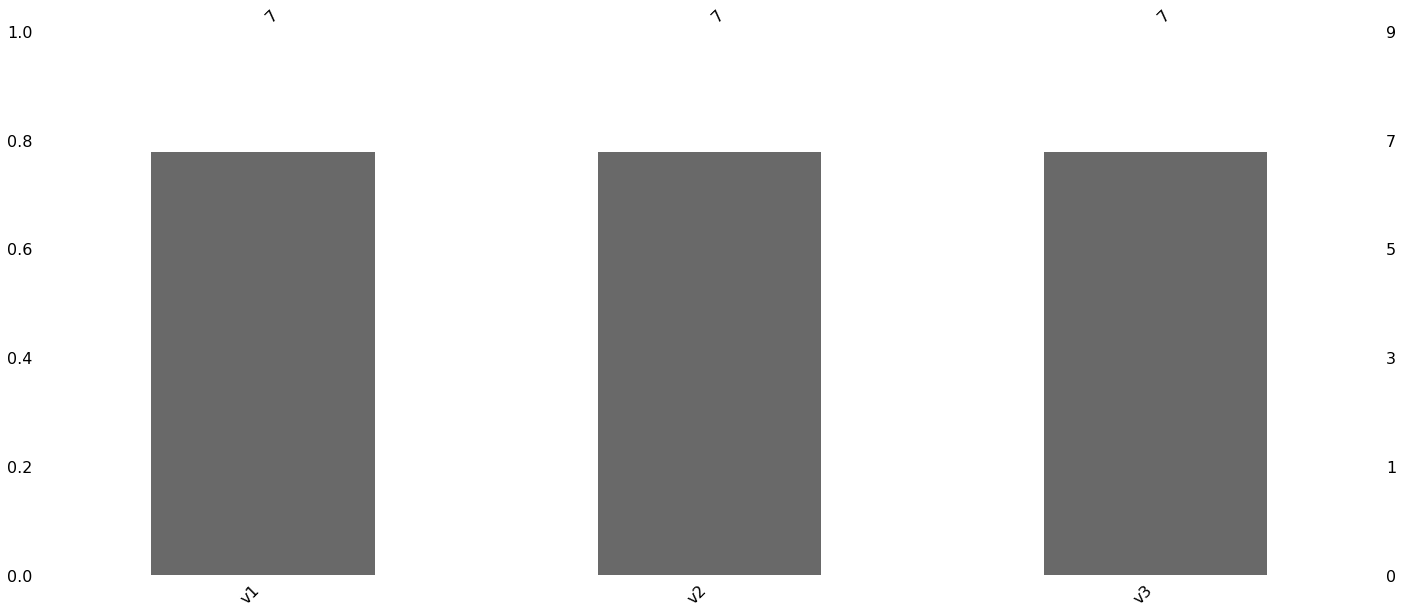

In [104]:
msno.bar(df)

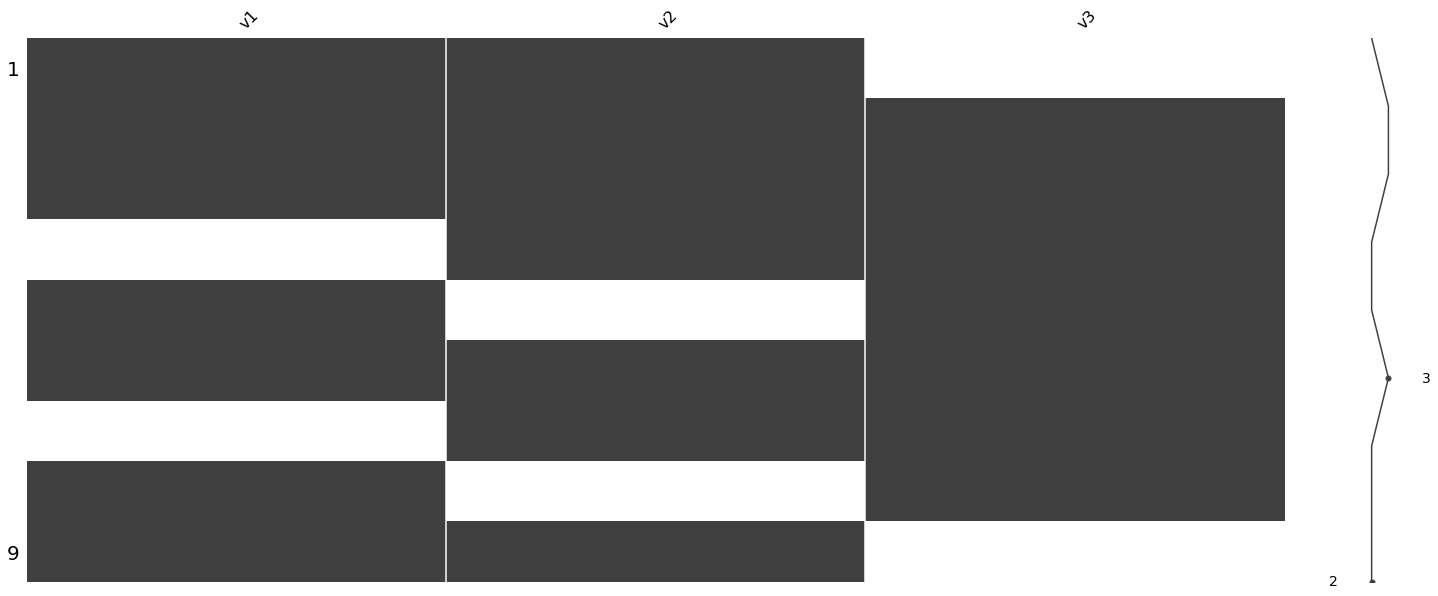

In [105]:
msno.matrix(df)

In [106]:
import seaborn as sns
df=sns.load_dataset("planets")
df.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [107]:
df.isnull().sum()

method              0
number              0
orbital_period     43
mass              522
distance          227
year                0
dtype: int64

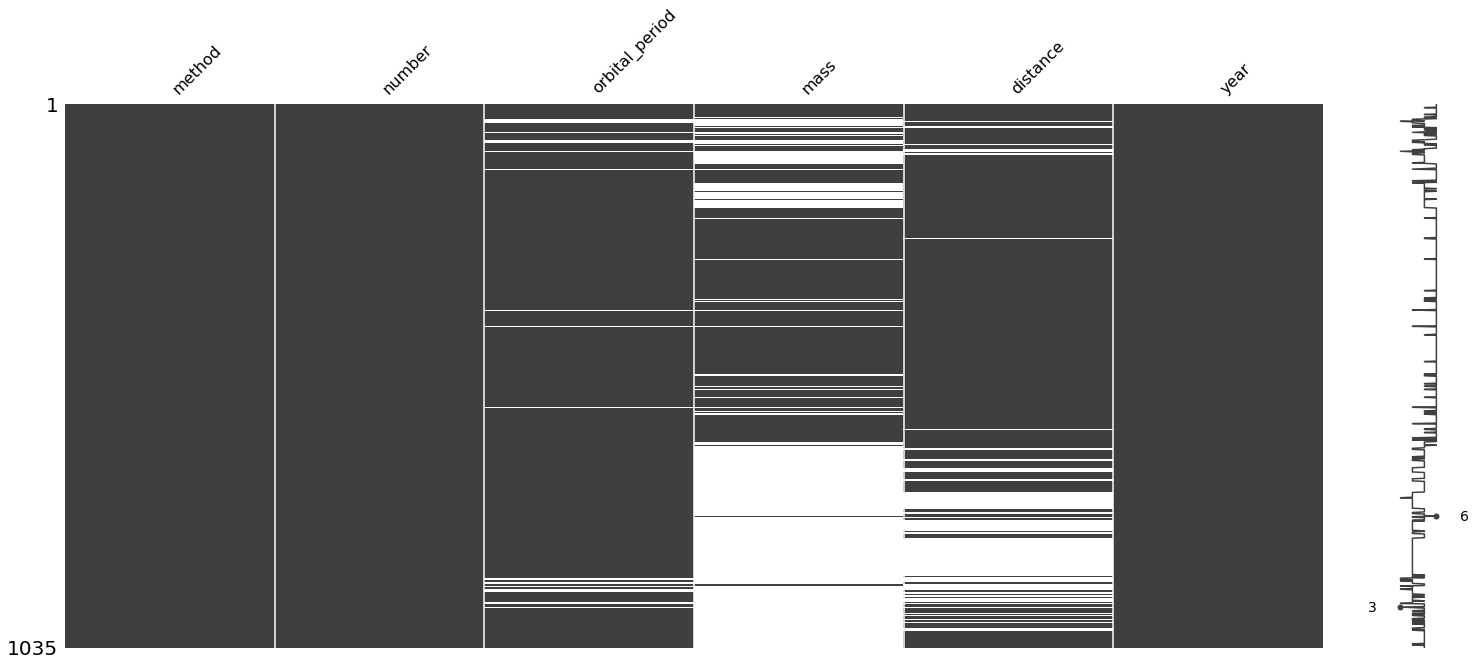

In [108]:
msno.matrix(df)

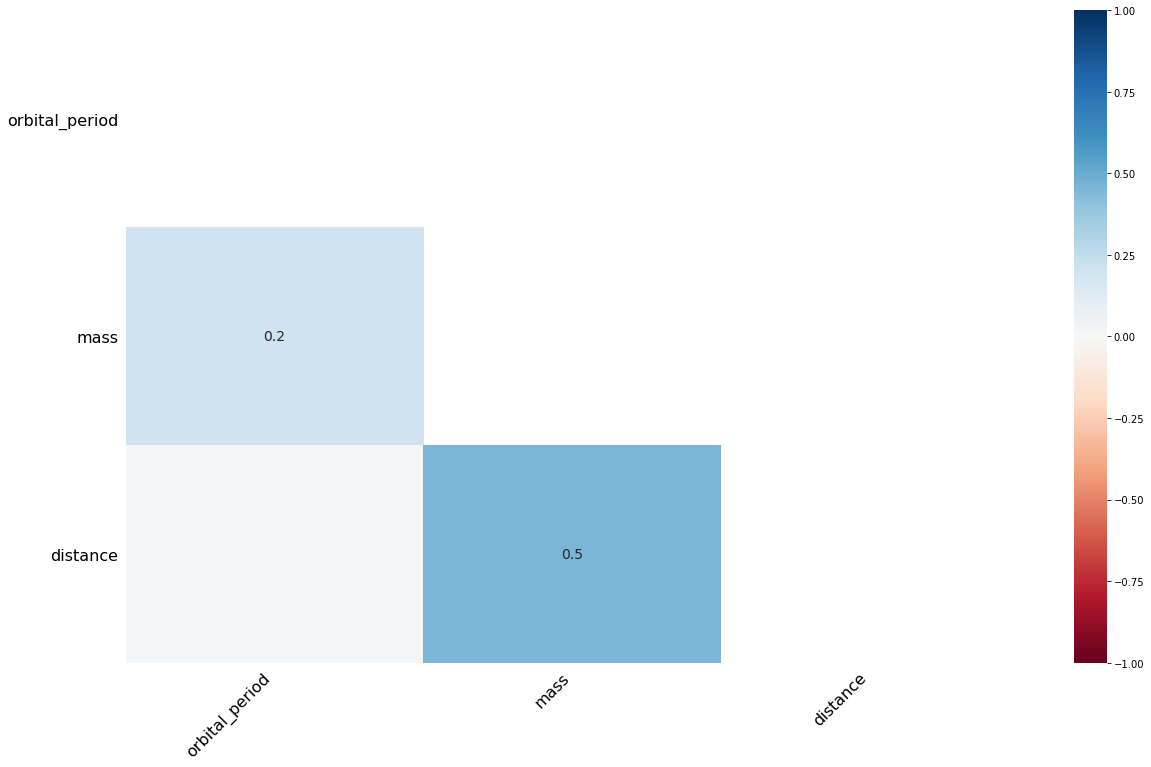

In [109]:
msno.heatmap(df)

### Silme Yöntemleri

In [111]:
v1=np.array([1,3,7,np.NaN,10,13,np.NaN,15,26])
v2=np.array([8,25,14,np.NaN,np.NaN,18,24,np.NaN,3])
v3=np.array([np.NaN,6,21,np.NaN,14,7,8,5,np.NaN])
df=pd.DataFrame({"v1":v1,"v2":v2,"v3":v3})
df

,v1,v2,v3
0,1.0,8.0,NaN
1,3.0,25.0,6.0
2,7.0,14.0,21.0
3,NaN,NaN,NaN
4,10.0,NaN,14.0
5,13.0,18.0,7.0
6,NaN,24.0,8.0
7,15.0,NaN,5.0
8,26.0,3.0,NaN


In [112]:
df.dropna(how="all")

,v1,v2,v3
0,1.0,8.0,NaN
1,3.0,25.0,6.0
2,7.0,14.0,21.0
4,10.0,NaN,14.0
5,13.0,18.0,7.0
6,NaN,24.0,8.0
7,15.0,NaN,5.0
8,26.0,3.0,NaN


In [113]:
df

,v1,v2,v3
0,1.0,8.0,NaN
1,3.0,25.0,6.0
2,7.0,14.0,21.0
3,NaN,NaN,NaN
4,10.0,NaN,14.0
5,13.0,18.0,7.0
6,NaN,24.0,8.0
7,15.0,NaN,5.0
8,26.0,3.0,NaN


Sayısal değişkenlerde atama

In [114]:
#tüm değişkenler için birinci yol

In [118]:
df.apply(lambda x:x.fillna(x.mean()),axis=0)

,v1,v2,v3
0,1.000000,8.000000,10.166667
1,3.000000,25.000000,6.000000
2,7.000000,14.000000,21.000000
3,10.714286,15.333333,10.166667
4,10.000000,15.333333,14.000000
5,13.000000,18.000000,7.000000
6,10.714286,24.000000,8.000000
7,15.000000,15.333333,5.000000
8,26.000000,3.000000,10.166667


In [116]:
#ikinci yol

In [117]:
df.fillna(df.mean()[:])

,v1,v2,v3
0,1.000000,8.000000,10.166667
1,3.000000,25.000000,6.000000
2,7.000000,14.000000,21.000000
3,10.714286,15.333333,10.166667
4,10.000000,15.333333,14.000000
5,13.000000,18.000000,7.000000
6,10.714286,24.000000,8.000000
7,15.000000,15.333333,5.000000
8,26.000000,3.000000,10.166667


In [119]:
df.fillna(df.mean()["v1":"v2"])

,v1,v2,v3
0,1.000000,8.000000,NaN
1,3.000000,25.000000,6.0
2,7.000000,14.000000,21.0
3,10.714286,15.333333,NaN
4,10.000000,15.333333,14.0
5,13.000000,18.000000,7.0
6,10.714286,24.000000,8.0
7,15.000000,15.333333,5.0
8,26.000000,3.000000,NaN


In [120]:
df["v3"].fillna(df["v3"].mean())

0    10.166667
1     6.000000
2    21.000000
3    10.166667
4    14.000000
5     7.000000
6     8.000000
7     5.000000
8    10.166667
Name: v3, dtype: float64

In [121]:
#ucuncu yol

In [125]:
df.where(pd.notna(df),df.mean(),axis="columns")

,v1,v2,v3
0,1.000000,8.000000,10.166667
1,3.000000,25.000000,6.000000
2,7.000000,14.000000,21.000000
3,10.714286,15.333333,10.166667
4,10.000000,15.333333,14.000000
5,13.000000,18.000000,7.000000
6,10.714286,24.000000,8.000000
7,15.000000,15.333333,5.000000
8,26.000000,3.000000,10.166667


### Kategorik Değişken Kırılımında Değer Atama

In [130]:
v1=np.array([1,3,7,np.NaN,10,13,np.NaN,15,26])
v2=np.array([8,25,14,np.NaN,np.NaN,18,24,np.NaN,3])
v3=np.array([np.NaN,6,21,np.NaN,14,7,8,5,np.NaN])
v4=np.array(["IT","IK","IK","IT","IK","IT","IK","IT","IT"])
df=pd.DataFrame({"maas":v1,"v2":v2,"v3":v3,"departman":v4})
df

,maas,v2,v3,departman
0,1.0,8.0,NaN,IT
1,3.0,25.0,6.0,IK
2,7.0,14.0,21.0,IK
3,NaN,NaN,NaN,IT
4,10.0,NaN,14.0,IK
5,13.0,18.0,7.0,IT
6,NaN,24.0,8.0,IK
7,15.0,NaN,5.0,IT
8,26.0,3.0,NaN,IT


In [131]:
df.groupby("departman").mean()

,maas,v2,v3
departman,,,
IK,6.666667,21.000000,12.25
IT,13.750000,9.666667,6.00


In [132]:
df.groupby("departman")["maas"].mean()

departman
IK     6.666667
IT    13.750000
Name: maas, dtype: float64

In [133]:
df["maas"].fillna(df.groupby("departman")["maas"].transform("mean"))

0     1.000000
1     3.000000
2     7.000000
3    13.750000
4    10.000000
5    13.000000
6     6.666667
7    15.000000
8    26.000000
Name: maas, dtype: float64

### Kategorik Değişkenlerde Değer Atama

In [134]:
v1=np.array([1,3,7,np.NaN,10,13,np.NaN,15,26])
v4=np.array(["IT",np.NaN,"IK","IT","IK","IT","IK","IT","IT"],dtype=object)
df=pd.DataFrame({"maas":v1,"departman":v4})
df

,maas,departman
0,1.0,IT
1,3.0,NaN
2,7.0,IK
3,NaN,IT
4,10.0,IK
5,13.0,IT
6,NaN,IK
7,15.0,IT
8,26.0,IT


In [135]:
df["departman"].fillna(df["departman"].mode()[0])

0    IT
1    IT
2    IK
3    IT
4    IK
5    IT
6    IK
7    IT
8    IT
Name: departman, dtype: object

In [136]:
df["departman"].fillna(method="bfill")

0    IT
1    IK
2    IK
3    IT
4    IK
5    IT
6    IK
7    IT
8    IT
Name: departman, dtype: object

In [137]:
df["departman"].fillna(method="ffill")

0    IT
1    IT
2    IK
3    IT
4    IK
5    IT
6    IK
7    IT
8    IT
Name: departman, dtype: object

### Tahmine Dayalı Değer Atama Yöntemleri

In [141]:
df=sns.load_dataset("titanic")
df1=df.select_dtypes(include=["float64","int64"])
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [142]:
df1.head()

,survived,pclass,age,sibsp,parch,fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


In [143]:
df1.isnull().sum()

survived      0
pclass        0
age         177
sibsp         0
parch         0
fare          0
dtype: int64

In [170]:
!pip install ycimpute==0.1.1

In [173]:
from ycimpute.imputer import knnimput

In [174]:
var_names=list(df1)

In [175]:
n_df=np.array(df1)

In [176]:
dff=knnimput.KNN(k=4).complete(n_df)

Imputing row 1/891 with 0 missing, elapsed time: 0.344
Imputing row 101/891 with 0 missing, elapsed time: 0.346
Imputing row 201/891 with 0 missing, elapsed time: 0.348
Imputing row 301/891 with 1 missing, elapsed time: 0.350
Imputing row 401/891 with 0 missing, elapsed time: 0.352
Imputing row 501/891 with 0 missing, elapsed time: 0.355
Imputing row 601/891 with 0 missing, elapsed time: 0.358
Imputing row 701/891 with 0 missing, elapsed time: 0.360
Imputing row 801/891 with 0 missing, elapsed time: 0.363


In [177]:
dff=pd.DataFrame(dff,columns=var_names)

In [178]:
dff.isnull().sum()

survived    0
pclass      0
age         0
sibsp       0
parch       0
fare        0
dtype: int64

In [147]:
#random forest

In [149]:
df1.head()

,survived,pclass,age,sibsp,parch,fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


In [150]:
df1.isnull().sum()

survived      0
pclass        0
age         177
sibsp         0
parch         0
fare          0
dtype: int64

In [154]:
var_names=list(df1)
var_names

['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare']

In [155]:
import numpy as np
n_df=np.array(df1)

In [156]:
!pip install ycimpute==0.1.1

In [158]:
from ycimpute.imputer import iterforest
dff=iterforest.IterImput().complete(n_df)

In [159]:
dff=pd.DataFrame(dff,columns=var_names)

In [160]:
dff.isnull().sum()

survived    0
pclass      0
age         0
sibsp       0
parch       0
fare        0
dtype: int64

In [163]:
from ycimpute.imputer import EM

In [164]:
var_names=list(df1)

In [165]:
import numpy as np
n_df=np.array(df1)

In [166]:
dff=EM().complete(n_df)

In [167]:
dff=pd.DataFrame(dff,columns=var_names)

In [168]:
dff.isnull().sum()

survived    0
pclass      0
age         0
sibsp       0
parch       0
fare        0
dtype: int64

## Değişken Dönüşümleri

### Değişken Standardizasyonu

In [180]:
import pandas as pd
import numpy as np
v1=np.array([2,5,7,8,9])
v2=np.array([8,7,11,5,3])
v3=np.array([11,13,7,9,14])
df=pd.DataFrame({"v1":v1,"v2":v2,"v3":v3})
df.astype(float)
df

,v1,v2,v3
0,2,8,11
1,5,7,13
2,7,11,7
3,8,5,9
4,9,3,14


### Standardizasyon

In [181]:
from sklearn import preprocessing

In [182]:
preprocessing.scale(df)

array([[-1.69222822,  0.44232587,  0.07808688],
       [-0.48349378,  0.07372098,  0.85895569],
       [ 0.32232919,  1.54814054, -1.48365074],
       [ 0.72524067, -0.6634888 , -0.70278193],
       [ 1.12815215, -1.40069858,  1.2493901 ]])

In [183]:
df

,v1,v2,v3
0,2,8,11
1,5,7,13
2,7,11,7
3,8,5,9
4,9,3,14


### Normalizasyon

In [184]:
preprocessing.normalize(df)

array([[0.14547859, 0.58191437, 0.80013226],
       [0.32075015, 0.44905021, 0.83395039],
       [0.47301616, 0.74331112, 0.47301616],
       [0.61357199, 0.38348249, 0.69026849],
       [0.53218116, 0.17739372, 0.82783735]])

### Min-Max Dönüşümü

In [185]:
scaler=preprocessing.MinMaxScaler(feature_range=(10,20))

In [186]:
scaler.fit_transform(df)

array([[10.        , 16.25      , 15.71428571],
       [14.28571429, 15.        , 18.57142857],
       [17.14285714, 20.        , 10.        ],
       [18.57142857, 12.5       , 12.85714286],
       [20.        , 10.        , 20.        ]])

### Değişken Dönüşümleri


In [187]:
df=sns.load_dataset("tips")
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### 0-1 Dönüşümü

In [189]:
from sklearn.preprocessing import LabelEncoder
lbe=LabelEncoder()

In [190]:
lbe.fit_transform(df["sex"])

array([0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0])

In [192]:
df["yeni_sex"]=lbe.fit_transform(df["sex"])
df.head()

,total_bill,tip,sex,smoker,day,time,size,yeni_sex
0,16.99,1.01,Female,No,Sun,Dinner,2,0
1,10.34,1.66,Male,No,Sun,Dinner,3,1
2,21.01,3.50,Male,No,Sun,Dinner,3,1
3,23.68,3.31,Male,No,Sun,Dinner,2,1
4,24.59,3.61,Female,No,Sun,Dinner,4,0


### 1 ve Diğerleri (0) Dönüşümü

In [194]:
df["yeni_day"]=np.where(df["day"].str.contains("Sun"),1,0)
df.head()

,total_bill,tip,sex,smoker,day,time,size,yeni_sex,yeni_day
0,16.99,1.01,Female,No,Sun,Dinner,2,0,1
1,10.34,1.66,Male,No,Sun,Dinner,3,1,1
2,21.01,3.50,Male,No,Sun,Dinner,3,1,1
3,23.68,3.31,Male,No,Sun,Dinner,2,1,1
4,24.59,3.61,Female,No,Sun,Dinner,4,0,1


### Çok Sınıflı Dönüşüm

In [196]:
from sklearn.preprocessing import LabelEncoder
lbe =LabelEncoder()

In [197]:
lbe.fit_transform(df["day"])

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 3])

In [200]:
#bu işlem algoritmaları bozabilir, aralarında derece farkı varmış gibi yansıtabilir.Önlemek için one hot dönüşümü yapılır.

### One Hot Dönüşümü Ve Dummy Değişken Tuzağı


In [201]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,yeni_sex,yeni_day
0,16.99,1.01,Female,No,Sun,Dinner,2,0,1
1,10.34,1.66,Male,No,Sun,Dinner,3,1,1
2,21.01,3.50,Male,No,Sun,Dinner,3,1,1
3,23.68,3.31,Male,No,Sun,Dinner,2,1,1
4,24.59,3.61,Female,No,Sun,Dinner,4,0,1


In [203]:
df_one_hot=pd.get_dummies(df,columns=["sex"],prefix=["sex"])
df_one_hot.head()

,total_bill,tip,smoker,day,time,size,yeni_sex,yeni_day,sex_Male,sex_Female
0,16.99,1.01,No,Sun,Dinner,2,0,1,0,1
1,10.34,1.66,No,Sun,Dinner,3,1,1,1,0
2,21.01,3.50,No,Sun,Dinner,3,1,1,1,0
3,23.68,3.31,No,Sun,Dinner,2,1,1,1,0
4,24.59,3.61,No,Sun,Dinner,4,0,1,0,1
